## Summary & Cheatsheet

Although YMMV with specific data problems, here's a quick "cheatsheet" you can use when choosing amongst clustering methods.


| **Method**           | **Key Control Parameters**                      | **Merits**                                                                      | **Use-Cases**                                                                                                  |
|----------------------|-------------------------------------------------|---------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|
| **K-means**          | - `n_clusters` (number of clusters)<br>- `init` (initialization method) | - Simple and fast<br>- Scalable to large datasets                               | - Spherical clusters<br>- Large datasets<br>- Known number of clusters                                         |
| **HAC**              | - `n_clusters` (number of clusters)<br>- `linkage` (linkage criterion)    | - Hierarchical representation<br>- No predefined number of clusters              | - Hierarchical structure<br>- Small to medium-sized datasets                                                    |
| **DBScan**           | - `eps` (max distance between samples)<br>- `min_samples` (min points in neighborhood) | - Arbitrarily shaped clusters<br>- Handles noise                                | - Spatial datasets with noise<br>- Clusters of varying densities                                               |
| **HDBScan**          | - `min_samples` (min points to form a cluster)<br>- `min_cluster_size` (smallest cluster size) | - Varying densities<br>- Hierarchical approach                                  | - Clusters of different sizes<br>- Noisy data                                                                  |
| **Spectral Clustering** | - `n_clusters` (number of clusters)<br>- `affinity` (similarity metric)      | - Non-convex clusters<br>- Graph-based approach                                 | - Complex cluster structures<br>- Graph-based clustering problems                                               |
| **GMM**              | - `n_components` (number of mixtures)<br>- `covariance_type` (shape of the distribution) | - Soft clustering<br>- Elliptical clusters                                      | - Elliptical clusters<br>- Soft assignments<br>- Gaussian distribution                                          |
| **Mean-shift**       | - `bandwidth` (radius of the region)<br>- `bin_seeding` (initial seeding strategy)  | - No assumption on number of clusters<br>- Non-spherical clusters                | - Unknown number of clusters<br>- Non-spherical clusters                                                        |



### Exercise

The following example sets up a clustering problem with the MNIST handwriting data.  Try the different clustering techniques above to improve the clustering.  What works the best?  What happens if you use "X" instead of "X_scaled"?

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


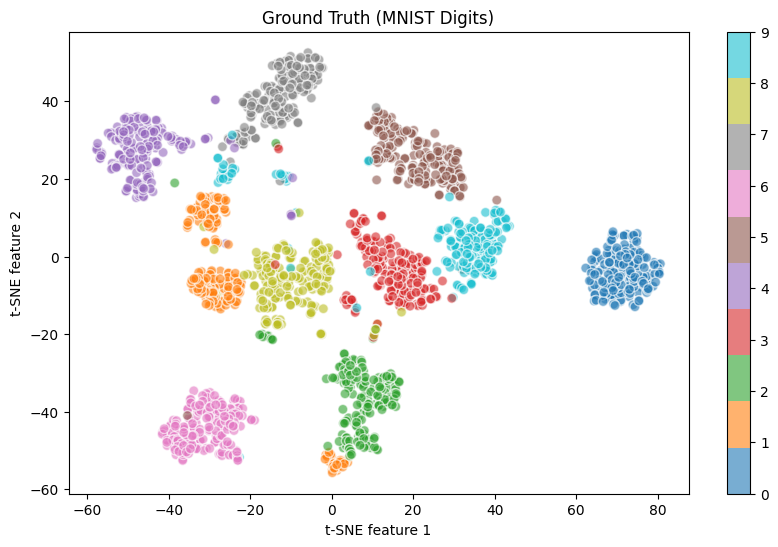

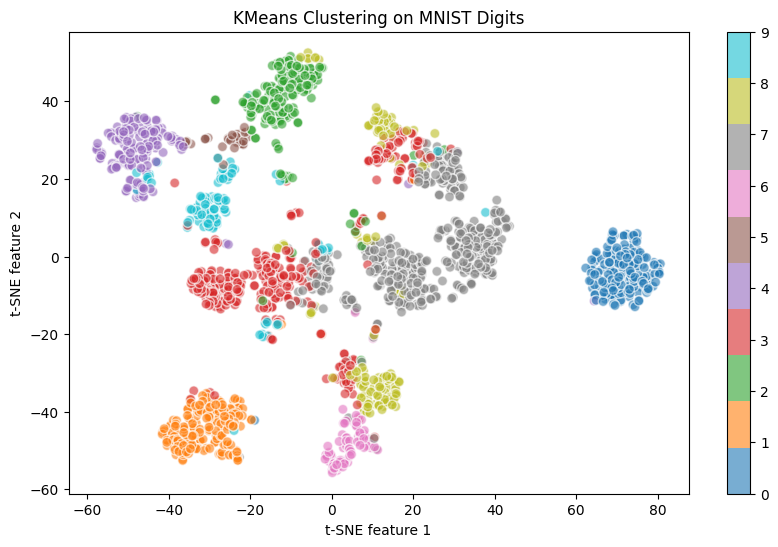

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the MNIST digit data
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualization function
def visualize_clusters(X_2D, labels, title=""):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6, edgecolors='w')
    plt.title(title)
    plt.xlabel('t-SNE feature 1')
    plt.ylabel('t-SNE feature 2')
    plt.colorbar(scatter)
    plt.show()

# Visualize ground truth
visualize_clusters(X_tsne, y, title="Ground Truth (MNIST Digits)")

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize KMeans clustering results
visualize_clusters(X_tsne, kmeans_labels, title="KMeans Clustering on MNIST Digits")

